# <font color=red>Pandas</font>
## A practical Pandas tutorial for Data Science by Ehsan Mokhtari
## I used 'Python Data Science Handbook by Jake VanderPlas' as a reference for this tutoria

### The word pandas is an acronym which is derived from <font color=green>Python and data analysis</font> and <font color=green>panel data</font>. Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.

### you can simply install pandas using <font color=green>pip install pandas</font> or <font color=green>pip install numpy --upgrade</font> for upgrading it. Remember that numpy is required for pandas so you need to install numpy anyway.

In [1]:
#simply we can import pandas and check its version
import pandas
print(pandas.__version__)

#Just as we generally import NumPy under the alias np, we will import Pandas under the alias pd:
import numpy as np
import pandas as pd

2.0.3


## <font color = red> Introducing Pandas Objects </font>

### At the very basic level, Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices. we have three fundamental Pandas data structures: <font color=green>the Series, DataFrame, and Index</font>.
### A <font color=green>Pandas Series</font> is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [2]:
s = pd.Series([0.25, 0.5, 0.75, 1.0])
print(s,"\n********")
print(s.values,"\n********")
print(s.index,"\n********")
print(s[1],'\n********')
print(s[1:3])
# print(s[1:3].unique()) #returns unique values (suppose its a set but its a list)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64 
********
[0.25 0.5  0.75 1.  ] 
********
RangeIndex(start=0, stop=4, step=1) 
********
0.5 
********
1    0.50
2    0.75
dtype: float64


In [3]:
''' while the NumPy array has an implicitly defined integer index used to access the values,
    the Pandas Series has an explicitly defined index associated with the values. '''
s = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
#if we do not define indices, it will be from 0 to n-1 or implicitly
print(s[1],"  ", s['b'],'\n********')   # implicitly vs explicitly defined index 

# We can even use noncontiguous or nonsequential indices:
s = pd.Series([0.25, 0.5, 0.75, 1.0], index=[1, 5, 3, 7])
print(s[1],'\n********')

# you can think of a Pandas Series a bit like a specialization of a Python dictionary.
s = pd.Series({'a':33, 'b':37, 'c':42})
print(s['a':'b'],'\n********')

print(pd.Series(5, index=[100, 200, 300]))

0.5    0.5 
********
0.25 
********
a    33
b    37
dtype: int64 
********
100    5
200    5
300    5
dtype: int64


### A <font color=green>DataFrame</font> is an analog of a two-dimensional array with both flexible row indices and flexible column names. you can think of a DataFrame as a sequence of aligned Series objects

In [4]:
food = ["egg", "chicken", "rice"]
calories = [42, 130, 200] 
df = pd.DataFrame({"food" : food , "cal" : calories})                     # using lists
#########################################################################################
data = {"food": ["egg", "chicken", "rice"], "cal": [42, 130, 200]} 
df = pd.DataFrame(data)                                                   # using 2-d dictionary
#########################################################################################
data = [["egg", "chicken", "rice"],[42, 130, 200],['bad','good','good'],['yes','yes','no']]   
print(np.array(data),'\n********') # normally it is 2d list with 4 rows and 3 columns
data = np.transpose(np.array(data))   #now we can reshape it to 4 rows and 3 columns
print(data, '\n********')
df = pd.DataFrame(data , columns=['food', 'cal','taste','healthy'], index=['a','b','c'])   # using 2-d lists
#########################################################################################
print(df, '\n********')
print(df.index)
print(df.columns , '\n********')
print(df['food'],'\n********' )  # print(df.food)
print(df['food']['a'], "  ",df['food'][0], '\n********')
########################################################################################
# df.loc['name']                           only shows this col
# df['cal' : 'healthy']                    shows cals to healthy cols
# df.loc[['cals','healthy']]               shows only these 2 cols
# df.loc[[0], ['name']]                    select one element
# df.loc[ :2 , ['name','cals']]            2 rows and only the mentiones cols  
# df.loc[[0, 1], ["name", "ccals"]]        selected rows and cols
# df.loc[ :'b' , 'taste': ]
# df[ df.cal > 100 & df.taste == 'good']   

# df.iloc[:2,:2] first 2 rows and columns
# df.T    rotate the array
#######################################################################################
df['time'] = [13,60,20]  #adding new column to the df
print(df) 

[['egg' 'chicken' 'rice']
 ['42' '130' '200']
 ['bad' 'good' 'good']
 ['yes' 'yes' 'no']] 
********
[['egg' '42' 'bad' 'yes']
 ['chicken' '130' 'good' 'yes']
 ['rice' '200' 'good' 'no']] 
********
      food  cal taste healthy
a      egg   42   bad     yes
b  chicken  130  good     yes
c     rice  200  good      no 
********
Index(['a', 'b', 'c'], dtype='object')
Index(['food', 'cal', 'taste', 'healthy'], dtype='object') 
********
a        egg
b    chicken
c       rice
Name: food, dtype: object 
********
egg    egg 
********
      food  cal taste healthy  time
a      egg   42   bad     yes    13
b  chicken  130  good     yes    60
c     rice  200  good      no    20


In [5]:
'''working with csv and excel files'''
# df = pd.read_csv("people.csv")
# df = pd.read_csv('people.csv', usecols=["Name", "Email"], nrows=3) imports only those cols and only 3 rows
# df = pd.read_csv("people.csv", index_col=['id']) this column will be set as index column
# df.head(5), df.tail(5), df.info(), df.shape , df.size , df.describe(), df.dtypes , 
# df.rename(columns={'old_name':'new_name'})  #change the column name
# df.drop(columns=['name'])                   #remove the column
# df.to_csv('people.csv')

# pd.read_excel('file.xlsx', index_col=0) ,na_values=['hello','bye'] converts these str to NaN
# ,dtype={'col_name': str, 'col_name': float} col dtype can be explicitly specified
# pd.to_excel('file.xlsx', sheet_name='Sheet1') sheet_name=None reads all the sheets in file
# pd.set_option('display.max_colwidth', None) this allows to show the full size data

'''working with files in python'''
# file = open(filename, mode='r') # 'r' read, 'w' write, "a" Append, 
# text = file.read()
# file.close()

'''working with Pickled files'''
# File type native to Python, Pickled les are serialized , Serialize = convert object to bytestream
#import pickle  #file = open(filename.pkl, mode='rb')  #data = pickle.load(file)

'''working with SAS and Stata files'''
# SAS: Statistical Analysis System, SAS: business analytics and biostatistics
# Stata: “Statistics” + “data” ,Stata: academic social sciences research
# data = pd.read_stata('urbanpop.dta')

'''working with HDF5 files'''
# Hierarchical Data Format version 5 ,Standard for storing large quantities of numerical data
# import h5py  #data = h5py.File(filename,'r')  #print(data.keys())  #print(data['key']) 

'''working with Matlab files''' #“Matrix Laboratory”
#import scipy.io  #data = scipy.io.loadmat('file.mat')  #print(data.keys())


'working with Matlab files'

In [6]:
'''working with The urllib package''' #pip install urllib  #Provides interface for fetching data across the web
# from urllib.request import urlretrieve
# urlretrieve('url', 'winequality-white.csv') #download the file and save the file

# from urllib.request import urlopen, Request
# request = Request('url')          #Universal Resource Locator, References to web resources
# response = urlopen(request)
# html = response.read()            #HyperText Markup Language
# response.close()

'''working with The request package''' #pip install requests
# import requests  
# r = requests.get('url')
# text = r.text

'''working with The BeautifulSoup package''' #Parse and extract structured data from HTML #pip install bs4
#import requests  #from bs4 import BeautifulSoup
# r = requests.get('url') to get data from a URL
# html_doc = r.text  #or  #json_doc = response.json()
# soup = BeautifulSoup(html_doc)
# print(soup.prettify())
# soup.? produces all the options

'''working with The Json package''' #JavaScript Object Notation
#import json  #file = open('file,json', mode='r')  #json_data = json.load(file)  #print(json_data.items())
#or
# df = pd.read_json("file.json", orient="split")

'working with The Json package'

### The <font color=green>Index object</font> is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set. 

In [7]:
ind = pd.Index([2, 3, 5, 7, 11])
print(ind)
print(ind[1])
print(ind[::2]) # from 0 to n with steps of 2
print(ind.size, ind.shape, ind.ndim, ind.dtype)
# ind[1] = 0  this throws an error because its immutable

Index([2, 3, 5, 7, 11], dtype='int64')
3
Index([2, 5, 11], dtype='int64')
5 (5,) 1 int64


## <font color = red> Data Indexing and Selection </font>

In [8]:
s = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(s['b'], 'a' in s , s.keys())
print(list(s.items()),'\n********')

s['b'] = 0.6  # assigning new value
s['e'] = 1.25 #new elemet with new index
print(s['b':'e'],'\n********') # print(s[1:5])
print(s[['a','c']], '\n********')            # selection
print(s[(s> .4) & (s <1)])

0.5 True Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)] 
********
b    0.60
c    0.75
d    1.00
e    1.25
dtype: float64 
********
a    0.25
c    0.75
dtype: float64 
********
b    0.60
c    0.75
dtype: float64


In [9]:
print(s, '\n********')
print(s.iloc[1] )
print(s.iloc[1:3], '\n********')          #implicit, based on normal array indexing starting with 0
print(s.loc['a'])
print(s.loc['b':'d'])                     #explicit, based on the index we have defined

a    0.25
b    0.60
c    0.75
d    1.00
e    1.25
dtype: float64 
********
0.6
b    0.60
c    0.75
dtype: float64 
********
0.25
b    0.60
c    0.75
d    1.00
dtype: float64


## <font color = red> Operating on Data in Pandas </font>

In [10]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
print(A, '\n********')
print(B, '\n********')
print(A+B, '\n********')
print(A.add(B, fill_value=0), '\n********')
# + add()  
# - sub(), subtract()
# * mul(), multiply()
# / truediv(), div(), divide()
# // floordiv()
# % mod()
# ** pow()
print(A - A.iloc[0], '\n********') #every row of A - A.iloc[0]
print(B.subtract(B['C'], axis=0))  #every column of B - B['C']

    A   B
0   6  19
1  14  10 
********
   B  A  C
0  7  4  6
1  9  2  6
2  7  4  3 
********
      A     B   C
0  10.0  26.0 NaN
1  16.0  19.0 NaN
2   NaN   NaN NaN 
********
      A     B    C
0  10.0  26.0  6.0
1  16.0  19.0  6.0
2   4.0   7.0  3.0 
********
   A  B
0  0  0
1  8 -9 
********
   B  A  C
0  1 -2  0
1  3 -4  0
2  4  1  0


### The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous.</br> The first sentinel value used by Pandas is None, a Python singleton object that is often used for missing data in Python code. Because None is a Python object, it cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type 'object'.

## <font color = red>Cleaning Data </font>
### Data cleaning is the process of identifying and fixing incorrect data and preparing data for processing.
### <font color=green>1. Removing duplicates</font>
### <font color=green>2. Remove irrelevant data</font>
for example removing unnecessary columns!
### <font color=green>3. Standardize capitalization</font>
### <font color=green>4. Convert data type</font>
Mainly converting str nased data formats to data-time formats and also checking numeric data
to be the float or int dtypes for faster operations.
### <font color=green>5. Handling outliers</font>
### <font color=green>6. Fix errors</font>
### <font color=green>7. Language Translation</font>
### <font color=green>8. Handle missing values</font>

In [11]:
n1 = np.array([1, None, 3, 4]); print(n1)
# trying to n1.sum() throws and error because None can not be used in arithmetic operations 

[1 None 3 4]


### The other missing data representation, <font color=green>NaN</font> (acronym for Not a Number), is different; it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.

In [12]:
n2 = np.array([1, np.nan, 3, 4]); print(n2)
# You should be aware that NaN is a bit like a data virus—it infects any other object it touches.
# Regardless of the operation, the result of arithmetic with NaN will be another NaN
print(n2.sum(), n2.min(), n2.max())
# NumPy does provide some special aggregations that will ignore these missing values:
print(np.nansum(n2), np.nanmin(n2), np.nanmax(n2), '\n********' )
# Notice that in addition to casting the integer array to floating point because of Nan,
# Also, Pandas automatically converts the None to a NaN value
n3 = pd.Series([1, np.nan, 2, None])
print(n3)

[ 1. nan  3.  4.]
nan nan nan
8.0 1.0 4.0 
********
0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64


In [13]:
n4 = pd.Series([1, np.nan, 'hello', None, False]); print(n4,  '\n********')
# n4.isnull()           Generate a Boolean mask indicating missing values
# n4[n4.notnull()]      returns not null values
n5 = pd.DataFrame([[1, np.nan, 2], [2, 3, 5], [np.nan, 4, 6]])
print(n5, '\n********')
print(n5.dropna() , '\n********')        # drop all rows containing Nan
# n5.dropna(axis='columns')              # drop all columns containing Nan
# n5.dropna(axis='columns', how='all')   # drop columns if all values are Nan
# n5.dropna(axis='rows', thresh=3)       # drop rows if less than 3 not-Nan are there 
# n5.fillna(0)                           # fill with 0
# n5.fillna(method='ffill' , axis = 1)   # fill with previous value baswed on columns
# n5.fillna(method='bfill' , axis = 0)   # fill with next values based on rows
# remember if next or previous values are Nan, then it will fill it with Nan!

0        1
1      NaN
2    hello
3     None
4    False
dtype: object 
********
     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6 
********
     0    1  2
1  2.0  3.0  5 
********


In [14]:
df = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],'salary':[7000, 12000, 8000, 10500],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})

#print(df['group'].value_counts())  #count of values
#print(df['group'].unique())        #extract uniq values as a list

'''droping'''
# df.drop('group', axis=1, inplace=True) removing group column
# df.drop(df[df['salary'] < 8000].index, inplace = True)  drops indices with lower salary

'''duplicate values'''
# add a row using dictionary
# new_row_dic = {'employee':'Bob' , 'salary':[7000],'group': ['Accounting'] }
# df = pd.concat([df, pd.DataFrame(new_row_dic)], ignore_index = True) 

# adding a row using lists
new_ls = ['Bob', 7000, 'Accounting']; new_ls2 = ['Bob', 7000, 'HR']
df.loc[len(df.index)] = new_ls ; df.loc[len(df.index)] = new_ls2
print(df,'\n**********')

# print(df.duplicated())  #A boolean list checks if a row has a fully duplicated row before or not
# print(df['salary'].duplicated()) #boolean list of specific col
print(df[df.duplicated(keep = False)],'\n**********')
print(df[df.duplicated(subset = ['employee','group'], keep = 'first')],'\n**********') #all duplicates in specific columns
# false brings all the duplicate values, 'first' returns first duplicate, 'last' returns last one
# df.drop_duplicates(inplace=True) #drops fully duplicated rows and only one remains

  employee  salary        group
0      Bob    7000   Accounting
1     Jake   12000  Engineering
2     Lisa    8000  Engineering
3      Sue   10500           HR
4      Bob    7000   Accounting
5      Bob    7000           HR 
**********
  employee  salary       group
0      Bob    7000  Accounting
4      Bob    7000  Accounting 
**********
  employee  salary       group
4      Bob    7000  Accounting 
**********


## <font color = red> Hierarchical Indexing </font>

In [15]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Joe', 'Alex'], ['HR', 'Temp']], names=['name', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
print(health_data)

name         Bob         Joe        Alex      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      31.0  37.9  29.0  36.7  42.0  35.6
     2      46.0  38.8  13.0  39.1  42.0  36.5
2014 1      36.0  36.9  24.0  37.8  48.0  38.0
     2      43.0  37.5  28.0  37.5  29.0  37.3


In [16]:
# health_data['Bob']
# health_data['Bob', 'HR']
# health_data.iloc[:2, :2]
############################################################################
idx = pd.IndexSlice
#                        year ,visit     name    type
print(health_data.loc[idx[:,     1], idx[  :,     'HR']], '\n*************')
#############################################################################
print(health_data.unstack(level=1), '\n*************') #or level=1
print(health_data.unstack(level=1).mean(axis=1))
# health_data.unstack().stack()  we have stack() for the reverse mode

name         Bob   Joe  Alex
type          HR    HR    HR
year visit                  
2013 1      31.0  29.0  42.0
2014 1      36.0  24.0  48.0 
*************
name    Bob                     Joe                    Alex                  
type     HR        Temp          HR        Temp          HR        Temp      
visit     1     2     1     2     1     2     1     2     1     2     1     2
year                                                                         
2013   31.0  46.0  37.9  38.8  29.0  13.0  36.7  39.1  42.0  42.0  35.6  36.5
2014   36.0  43.0  36.9  37.5  24.0  28.0  37.8  37.5  48.0  29.0  38.0  37.3 
*************
year
2013    35.633333
2014    36.083333
dtype: float64


## <font color = red>Combining Datasets</font>

In [17]:
# pd.concat() can be used for a simple concatenation of Series or DataFrame objects
df1 = pd.DataFrame([['a0','b0','c0'],['a1','b1','c1']],columns=['a', 'b','c'], index=[0,1])
df2 = pd.DataFrame([['a2','b2','c2'],['a3','b3','c3']],columns=['a', 'b','c'], index=[2,3])
df3 = pd.DataFrame([['b4','c4','d4'],['b5','c5','d5']],columns=['b', 'c','d'], index=[4,5])
df4 = pd.DataFrame([['b0','c0','d0'],['b1','c1','d1']],columns=['b', 'c','d'], index=[0,1])
print(df1,'\n********' );print(df2,'\n********');print(df3)

    a   b   c
0  a0  b0  c0
1  a1  b1  c1 
********
    a   b   c
2  a2  b2  c2
3  a3  b3  c3 
********
    b   c   d
4  b4  c4  d4
5  b5  c5  d5


In [18]:
# pd.concat(objs, axis=0, join='outer', ignore_index=False,
#    keys=None, levels=None, names=None, verify_integrity=False, copy=True)

print(pd.concat([df1, df1]), '\n********')  #regardless of duplicate index or not, it will concat downwards by raws.
# ,verify_integrity=True throws an error if we have duplicate index
print(pd.concat([df1, df1], ignore_index=True), '\n********') #will create a new integer index for result


print(pd.concat([df2, df3]), '\n********')
print(pd.concat([df2, df3], axis=1), '\n********') #regardless of duplicate columns or not, it will create new columns

print(pd.concat([df1, df2], keys=['x', 'y']),'\n********') #the keys create the Hierarchical Indexing

print(pd.concat([df2, df3], join='inner'),'\n********') #axis=0,1 join with duplicate rows,columns

    a   b   c
0  a0  b0  c0
1  a1  b1  c1
0  a0  b0  c0
1  a1  b1  c1 
********
    a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a0  b0  c0
3  a1  b1  c1 
********
     a   b   c    d
2   a2  b2  c2  NaN
3   a3  b3  c3  NaN
4  NaN  b4  c4   d4
5  NaN  b5  c5   d5 
********
     a    b    c    b    c    d
2   a2   b2   c2  NaN  NaN  NaN
3   a3   b3   c3  NaN  NaN  NaN
4  NaN  NaN  NaN   b4   c4   d4
5  NaN  NaN  NaN   b5   c5   d5 
********
      a   b   c
x 0  a0  b0  c0
  1  a1  b1  c1
y 2  a2  b2  c2
  3  a3  b3  c3 
********
    b   c
2  b2  c2
3  b3  c3
4  b4  c4
5  b5  c5 
********


In [19]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'salary': [70000, 80000, 120000, 90000]})
print(df1,'\n********'); print(df2,'\n********');  print(df3,'\n********'); 

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 
********
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014 
********
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000 
********


In [20]:
print(pd.merge(df1, df2),'\n********') # pd.merge(df1, df2, on='employee')
print(pd.merge(df1, df3, left_on="employee", right_on="name")) # different col names
# ,suffixes=('_x','_y') in case that merge produces same col twice, the new cols will have these suffixes on names

# pd.merge_ordered() #with ordering indices

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014 
********
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [21]:
df4 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],'food': ['fish', 'beans', 'bread']}, columns=['name', 'food'])
df5 = pd.DataFrame({'name': ['Mary', 'Joseph'],'drink': ['wine', 'beer']}, columns=['name', 'drink'])
print(df4,'\n********'); print(df5);

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 
********
     name drink
0    Mary  wine
1  Joseph  beer


In [22]:
print(pd.merge(df4, df5, on='name'),'\n********' )  # on = ['a','b']
# ,indicator=True adds a column to output df called “_merge” with information on the source of each row
print(pd.merge(df4, df5, how='outer'),'\n********') # how = left,right,outer,inner,cross, default is inner
print(pd.merge(df4, df5, how='left')) #also we have how = 'right'

   name   food drink
0  Mary  bread  wine 
********
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer 
********
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


## <font color = red> Aggregation and Grouping</font>

In [23]:
df = pd.DataFrame({'A': np.random.randint(0, 10,(5)),'B': np.random.randint(0, 10,(5)), 'c': np.random.randint(0, 10,(5))})
print(df)

   A  B  c
0  9  2  6
1  8  3  8
2  8  0  5
3  6  8  2
4  9  0  1


In [24]:
print(df.describe(), '\n********')
print(df.mean(axis=0)) # or axis=1
# count() Total number of items
# first(), last() First and last item
# mean(), median() Mean and median
# min(), max() Minimum and maximum
# std(), var() Standard deviation and variance
# mad() Mean absolute deviation
# prod() Product of all items
# sum() Sum of all items

''' aggregate'''
print(df.aggregate(['min', np.median, max]),'\n********')
print(df.aggregate({'A': 'min','B': 'max'}),'\n********')

'''transform'''
print(df.transform(lambda x: x - x.mean(axis=0)))

'''apply'''
#def square(x):
#    return x * x
#df1 = df.apply(square)

              A         B         c
count  5.000000  5.000000  5.000000
mean   8.000000  2.600000  4.400000
std    1.224745  3.286335  2.880972
min    6.000000  0.000000  1.000000
25%    8.000000  0.000000  2.000000
50%    8.000000  2.000000  5.000000
75%    9.000000  3.000000  6.000000
max    9.000000  8.000000  8.000000 
********
A    8.0
B    2.6
c    4.4
dtype: float64
          A    B    c
min     6.0  0.0  1.0
median  8.0  2.0  5.0
max     9.0  8.0  8.0 
********
A    6
B    8
dtype: int32 
********
     A    B    c
0  1.0 -0.6  1.6
1  0.0  0.4  3.6
2  0.0 -2.6  0.6
3 -2.0  5.4 -2.4
4  1.0 -2.6 -3.4


'apply'

### makes clear what the GroupBy accomplishes:</br> • The split step involves breaking up and grouping a DataFrame depending on the value of the specified key.</br> • The apply step involves computing some function, usually an aggregate, transfor‐ mation, or filtering, within the individual groups.</br> • The combine step merges the results of these operations into an output array.

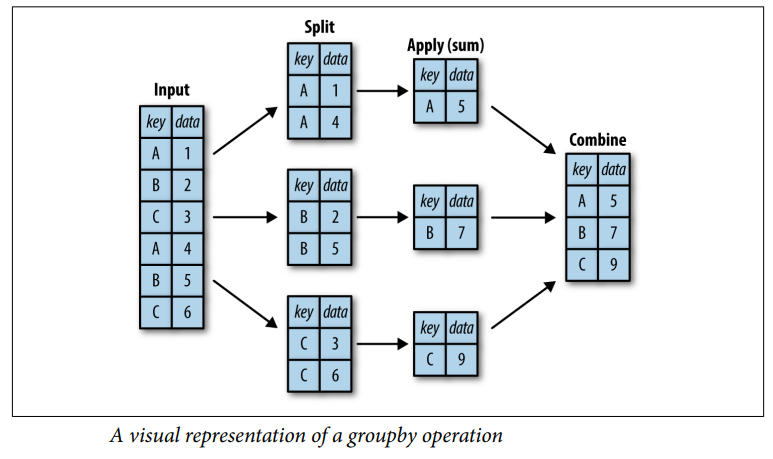

In [25]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data1': range(6),'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
print(df, '\n********')

print(df.groupby('key'), '\n********') # you can simply treat it a collection of DataFrames

print(df.groupby('key').sum(),'\n********')
print(df.groupby('key')['data1'].sum(),'\n********')

  key  data1  data2
0   A      0      7
1   B      1      7
2   C      2      2
3   A      3      5
4   B      4      4
5   C      5      1 
********
********
     data1  data2
key              
A        3     12
B        5     11
C        7      3 
********
key
A    3
B    5
C    7
Name: data1, dtype: int64 
********


In [26]:
'''Collapsing data into categories'''
# mapping = {'Microsoft':'DesktopOS', 'Linux':'DesktopOS','IOS':'MobileOS', 'Android':'MobileOS'}
# df['operating_system'] = df['operating_system'].replace(mapping)

'Collapsing data into categories'

## <font color = red> Pivot Tables </font>
###  A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple columnwise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you splitapply-combine, but both the split and the combine happen across not a onedimensional index, but across a two-dimensional grid

In [27]:
df = pd.DataFrame({"sex": ["m", "m", "f", "m", "f", "f", "f", "m"],
                   "age": [29, 18, 17, 32, 48, 33, 26, 40],
                   "survived": [0, 1, 1, 0,0,1,0,1],
                   "class": [3, 1, 1, 2, 3, 2, 2, 1],})
print(df)

  sex  age  survived  class
0   m   29         0      3
1   m   18         1      1
2   f   17         1      1
3   m   32         0      2
4   f   48         0      3
5   f   33         1      2
6   f   26         0      2
7   m   40         1      1


In [28]:
# pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean',
#        fill_value=None, margins=False,  dropna=True, margins_name='All')
print(df.pivot_table('survived', index='sex', columns='class', aggfunc = sum),'\n********' )

# It’s useful to compute totals along each grouping. This can be done via the margins keyword
print(df.pivot_table('survived', index='sex', columns='class', aggfunc = sum, margins=True),'\n********' )

class  1  2  3
sex           
f      1  1  0
m      2  0  0 
********
class  1  2  3  All
sex                
f      1  1  0    2
m      2  0  0    2
All    3  1  0    4 
********


## <font color = red> Vectorized String Operations </font>


In [29]:
names = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])
print(names)

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object


In [30]:
# names.str.capitalize()
# names.str.lower() , upper() 
# names.str.islower() , isupper()
# names.str.len()             returns len list
# names.str.startswith('T'),endswith('T')  returns a boolean list
print(names.str.split(),'\n********')   #splits based on given str, default is whitespace      
print(names.str.extract('([A-Za-z]+)'),'\n********') #returns the matched re expression
# names.str.match('re')                 #returns a boolean list matching the re expression
print(names.str.findall(r'^[^AEIOU].*[^aeiou]$'),'\n********') # find all elements matching the re 
# names.str.replace()
# names.str.contains()  returns a boolean list
# names.str.count()
# names.str.cat()       concatnate the elements with the given str

# df["Phone number"] = df["Phone number"].str.replace("-","")


0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object 
********
         0
0   Graham
1     John
2    Terry
3     Eric
4    Terry
5  Michael 
********
0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object 
********


## <font color = red> High-Performance Pandas: eval() and query() </font>

### consider this operation : mask = (x > 0.5) & (y < 0.5) </br> Because NumPy evaluates each subexpression, this is roughly equivalent to the following:</br> tmp1 = (x > 0.5)</br> tmp2 = (y < 0.5)</br> mask = tmp1 & tmp2</br> In other words, every intermediate step is explicitly allocated in memory. If the x and y arrays are very large, this can lead to significant memory and computational over head.

### The <font color = green>Numexpr</font> library gives you the ability to compute this type of compound expression element by element, without the need to allocate full intermediate arrays.The benefit here is that Numexpr evaluates the expression in a way that does not use full-sized temporary arrays, and thus can be much more efficient than NumPy, especially for large arrays.

In [31]:
#import numexpr
#mask = numexpr.evaluate('(x > 0.5) & (y < 0.5)')

### The Pandas eval() and query() tools that we will discuss here are conceptually similar

In [32]:
'''The eval() function in Pandas uses string expressions to efficiently compute operations using DataFrames'''

'''pd.eval() supports all arithmetic operators'''
# pd.eval('-df1 * df2 / (df3 + df4) - df5')

'''pd.eval() supports all comparison operators'''
# pd.eval('df1 < df2 <= df3 != df4')

'''pd.eval() supports the & and | bitwise operators'''
# pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')

'''it supports the use of the literal and and or in Boolean expressions'''
# pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')

'''pd.eval() supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax'''
# pd.eval('df2.T[0] + df3.iloc[1]')

'''accessing the array elements'''
# (df['A'] + df['B']) / (df['C'] - 1)  >>>   pd.eval("(df.A + df.B) / (df.C - 1)")

'''create a new column 'D' and assign to it a value computed from the other columns'''
# pd.eval('df.D = (df.A + df.B) / df.C', inplace=True)

'''Local variables in DataFrame.eval()'''
# var = 5
# pd.eval('df.A / @var')

'Local variables in DataFrame.eval()'

In [33]:
# pd.query('df.A < @Cmean and df.B < @Cmean')

## <font color=red> Time Series</font>


In [34]:
from datetime import date

bd = date(1997,6,22); date2 = date(2003,4,26)

print(bd.strftime("%d/%m/%Y"))
print(bd, type(bd), bd.year, bd.month, bd.day)
print(bd.weekday()) #0monday #1tuesday ... #6sunday

#print(min(bd,date2)) 

delta = date2 - bd
print(delta.days)

22/06/1997
1997-06-22 <class 'datetime.date'> 1997 6 22
6
2134


In [35]:
from datetime import timedelta

td = timedelta(days=29)
print(bd+td)

1997-07-21


In [36]:
from datetime import datetime

#dt = datetime(2017, 10, 1, 15, 23, 25)
dt = datetime(year=2017, month=10, day=1,hour=15, minute=23, second=25)

dt = dt.replace(minute=0)

print(dt.strftime("%Y-%m-%d %H:%M:%S"))

2017-10-01 15:00:25


In [37]:
import pandas as pd

bd = pd.to_datetime('1997-06-22 7:00am')
#dates = pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y') list of dates

print(bd, type(bd))

1997-06-22 07:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [38]:
#parse_dates is used for cilumns with data format to apply this format on them
df = pd.read_csv('df.csv',usecols=['Start date','End date'], parse_dates = ['Start date','End date'])
#or 
#df = pd.read_csv('df.csv',usecols=['Start date','End date'])
#df['Start date'] = pd.to_datetime(df[Start date])
#df['End date'] = pd.to_datetime(df[End date])

print(df.head(2))
print(type(df['Start date'].iloc[0]))

           Start date            End date
0 2017-10-01 15:23:25 2017-10-01 15:26:26
1 2017-10-01 15:42:57 2017-10-01 17:49:59
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [39]:
df['Duration'] = df['End date'] - df['Start date']
print(df['Duration'].head(2))

print(df['Duration'].dt.total_seconds().head(2))
# .dt.month  .dt.month  .dt.day  .dt.hour  .dt.minute .dt.second 

print(df['Duration'].mean()); print(df['Duration'].sum())
# .min() .max()

0   0 days 00:03:01
1   0 days 02:07:02
Name: Duration, dtype: timedelta64[ns]
0     181.0
1    7622.0
Name: Duration, dtype: float64
0 days 00:35:40.200000
0 days 02:58:21


In [40]:
df['Start year'] = df['Start date'].dt.year

print(df.head(2))

           Start date            End date        Duration  Start year
0 2017-10-01 15:23:25 2017-10-01 15:26:26 0 days 00:03:01        2017
1 2017-10-01 15:42:57 2017-10-01 17:49:59 0 days 02:07:02        2017
